# PROBLEM OVERVIEW
In today's digital age, e-commerce platforms face the challenge of analyzing vast amounts of customer feedback to understand product sentiment accurately. Understanding customersentiment is crucial for businesses to makeinformed decisions about productimprovements, marketing strategies, andcustomer satisfaction. However, manuallyanalyzing thousands of product reviews istime-consuming and inefficient. Therefore,there is a need for an automated sentimentanalysis solution to process and interpret thesereviews efficiently.

## Importing of Libraries

In [3]:
# Numerical computing library
import numpy as np

# Data manipulation and analysis library
import pandas as pd

# Statistical data visualization library based on matplotlib
import seaborn as sns

# Plotly Express: A library for creating interactive and visually appealing plots.
import plotly.express as px

# Interactive plotting library that works as a connector for plotly and pandas
import cufflinks as cf

# Plotting library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Natural Language Toolkit: library for working with human language data
import nltk

# String module for common string operations
import string

# System-specific parameters and functions
import sys

# Miscellaneous operating system interfaces
import os

# Regular expression operations
import re

# NLTK module: corpus of stopwords
from nltk.corpus import stopwords

# NLTK module: tokenizer
from nltk.tokenize import word_tokenize

# NLTK module: lemmatizer
from nltk.stem import WordNetLemmatizer

# NLTK module: sentiment analysis using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK module: tokenizer (repeated import, can be removed)
from nltk import word_tokenize 

# NLTK module: lemmatizer (repeated import, can be removed)
from nltk.stem import WordNetLemmatizer

# VADER sentiment analysis tool from vaderSentiment library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# TextBlob library for processing textual data
from textblob import TextBlob

# WordCloud library for creating word clouds
from wordcloud import WordCloud

# Plotly module for creating subplots
from plotly.subplots import make_subplots

# Scikit-learn module: splitting data into train and test sets
from sklearn.model_selection import train_test_split

# Scikit-learn module: transforming text data to feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Scikit-learn module: logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# Collections Counter: A specialized dictionary subclass to count hashable objects, useful for frequency distributions.
from collections import Counter

# NLTK download: Used to download necessary datasets and models for NLP tasks.
from nltk import download

# Scikit-learn's SVC (Support Vector Classification): A classification algorithm used for text classification tasks.
from sklearn.svm import SVC

# Scikit-learn's MultinomialNB (Multinomial Naive Bayes): A probabilistic classifier suitable for text classification tasks.
from sklearn.naive_bayes import MultinomialNB

# Scikit-learn module: metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Scikit-learn module: converting a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Library for creating visually appealing ASCII tables in Python
from prettytable import PrettyTable 

# Scikit-learn module: creating a pipeline for workflow automation
from sklearn.pipeline import Pipeline

# Scikit-learn module: confusion matrix for evaluating classification
from sklearn.metrics import confusion_matrix

# Warnings module for managing warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Setting pandas display option to show all columns
pd.set_option("display.max_columns", None)


## Importing of Data

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv("C:\\Users\\hp\Downloads\\Team Bravo dataset.csv")

# Display the first 5 rows of the DataFrame
df.head(5)

Id                     Username Location Total Review Date of Experience  \
0   0            Christopher Smith       GB     3reviews          30-Jan-24   
1   1              blarp.tha.alien       AU      1review          16-May-24   
2   2  Margarita Chavez Villalobos       US     3reviews          13-May-24   
3   3                 Mario Alzate       US      1review          18-May-24   
4   4                      AE user       US      1review           4-May-24   

                                             Content  Rating  
0  I have been shopping with Amazon for some time...       4  
1  Amazon is Legit a great place to find amazing ...       5  
2  Amazon does pretty good on delivering SMALL it...       3  
3  Well, if you educate yourself just a little on...       5  
4  Found some nice deals, but also ran into a sca...       5

## Making a Copy of the Data

In [7]:
# Create a copy of the DataFrame to avoid modifying the original data
data = df.copy()

# Display the entire copied DataFrame
data


Id                     Username Location Total Review  \
0          0            Christopher Smith       GB     3reviews   
1          1              blarp.tha.alien       AU      1review   
2          2  Margarita Chavez Villalobos       US     3reviews   
3          3                 Mario Alzate       US      1review   
4          4                      AE user       US      1review   
...      ...                          ...      ...          ...   
46095  46095                Victoria Lars       SE      1review   
46096  46096                     Jimmy An       KR     2reviews   
46097  46097       Kasper Fisker Thorlaks       DK     3reviews   
46098  46098                  ignatius ho       MY     2reviews   
46099  46099                           MW       GB     4reviews   

      Date of Experience                                            Content  \
0              30-Jan-24  I have been shopping with Amazon for some time...   
1              16-May-24  Amazon is Legit a great place to find amazing ...   
2              13-May-24  Amazon does pretty good on delivering SMALL it...   
3              18-May-24  Well, if you educate yourself just a little on...   
4               4-May-24  Found some nice deals, but also ran into a sca...   
...                  ...                                                ...   
46095          23-Nov-12  after pruchase and when payment was made, sell...   
46096          23-Nov-12  if you place an order from Amazon, as all list...   
46097          22-Nov-12  I've dealt on Amazon 11 times now and haven't ...   
46098          19-Nov-12  Amazon failed open investigation to refund eve...   
46099          15-Nov-12  First of all, before I ordered from this site,...   

       Rating  
0           4  
1           5  
2           3  
3           5  
4           5  
...       ...  
46095       1  
46096       1  
46097       4  
46098       1  
46099       5  

[46100 rows x 7 columns]

In [8]:
# data verification - Data type, number of features, rows and missing data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46100 entries, 0 to 46099
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  46100 non-null  int64 
 1   Username            46096 non-null  object
 2   Location            46088 non-null  object
 3   Total Review        46100 non-null  object
 4   Date of Experience  46100 non-null  object
 5   Content             36717 non-null  object
 6   Rating              46100 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.5+ MB


It was observed that there are some missing data in the 'Content', 'Username', and 'Location'. Also, the total review data-type is object as against int and the Date of Experience is also appearing as object instead of date-time format.

## Data Cleaning

Id                       0
Username                 4
Location                12
Total Review             0
Date of Experience       0
Content               9383
Rating                   0
dtype: int64


<Axes: >

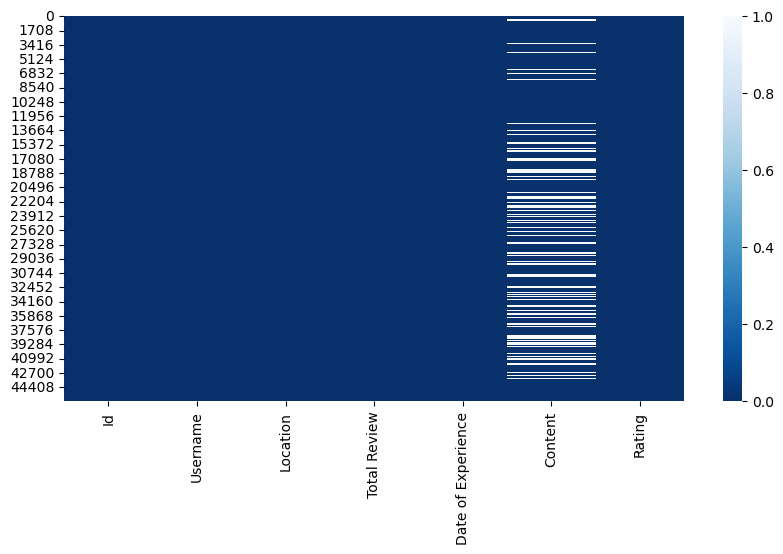

In [11]:
# Print the sum of missing values for each column in the DataFrame
print(data.isnull().sum())

# Set the size of the figure
plt.figure(figsize=(10, 5))

# Create a heatmap to visualize the missing values in the DataFrame
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [12]:
# Fill missing values in the 'Content' column with the string 'No Review'
data['Content'] = data['Content'].fillna('No Review')

In [13]:
# Convert the 'Date of Experience' column to datetime format, handling mixed formats
data["Date of Experience"] = pd.to_datetime(data["Date of Experience"], format="mixed")

# Display the first value in the 'Date of Experience' column
data["Date of Experience"][0]

Timestamp('2024-01-30 00:00:00')

In [14]:
# Remove the word 'review' from the 'Total Review' column
data['Total Review'] = data['Total Review'].str.replace('review', '')

# Remove the letter 's' from the 'Total Review' column
data['Total Review'] = data['Total Review'].str.replace('s', '')

# Convert the 'Total Review' column to numeric, coercing errors to NaN
data['Total Review'] = pd.to_numeric(data['Total Review'], errors='coerce')

# Replace periods in the 'Username' column with spaces
data['Username'] = data['Username'].str.replace('.', ' ')


In [15]:
# Drop rows with any missing values
data = data.dropna()

# Print the number of rows in the resulting DataFrame
len(data)

46084

## Understanding the Data

In [17]:
#Confirming the information on the missing data and the Dtye

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46084 entries, 0 to 46099
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  46084 non-null  int64         
 1   Username            46084 non-null  object        
 2   Location            46084 non-null  object        
 3   Total Review        46084 non-null  int64         
 4   Date of Experience  46084 non-null  datetime64[ns]
 5   Content             46084 non-null  object        
 6   Rating              46084 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.8+ MB


In [18]:
# Generate descriptive statistics of the DataFrame
data.describe()


Id  Total Review             Date of Experience        Rating
count  46084.000000  46084.000000                          46084  46084.000000
mean   23050.855394      4.075536  2019-11-22 08:39:17.920319232      3.929607
min        0.000000      1.000000            2012-11-15 00:00:00      1.000000
25%    11526.750000      1.000000            2018-07-06 00:00:00      3.000000
50%    23051.500000      1.000000            2019-09-12 00:00:00      5.000000
75%    34575.250000      3.000000            2020-09-06 00:00:00      5.000000
max    46099.000000    355.000000            2024-05-18 00:00:00      5.000000
std    13308.051792      9.856493                            NaN      1.686118

Observations
- The minimum review given by a customer is 1 and the maximum is 355.
- The rating is very positive as it is 5 on average.

In [20]:
# Calculate and print the number of duplicate rows in the DataFrame
print(data.duplicated().sum())


0


In [21]:
def check_class(dataframe):
    # Create a DataFrame to store the number of unique values for each column
    nunique_data = pd.DataFrame({
        'Variable': dataframe.columns,  # Column names
        'Classes': [dataframe[i].nunique() for i in dataframe.columns]  # Number of unique values
    })
    
    # Sort the DataFrame by the number of unique values in descending order
    nunique_data = nunique_data.sort_values('Classes', ascending=False)
    
    # Reset the index of the DataFrame
    nunique_data = nunique_data.reset_index(drop=True)
    
    # Return the DataFrame with the number of unique classes
    return nunique_data

# Call the function with the DataFrame 'data' and display the result
check_class(data)


Variable  Classes
0                  Id    46084
1            Username    42279
2             Content    36236
3  Date of Experience     3678
4            Location      198
5        Total Review      156
6              Rating        5

## Data Cleaning Contd.

In [23]:
# Retrieve the value in the 'Content' column at index 46097
data.loc[46097, 'Content']


"I've dealt on Amazon 11 times now and haven't had any major problems. There was one seller though that didn't refund me, after I had accepted his proposition for my dispute. Alixpress need better communication with customer service. That is my only beef with them.The site consists of many different sellers, so you can not blame Amazon for individual sellers being dishonest. Be sure to open a dispute IN TIME if your item hasn't arrived."

In [24]:
# Dictionary mapping contractions to their expanded forms
contractions_dict = {
    r"won't\b": "will not",
    r"can't\b": "can not",
    r"shouldn't\b": "should not",
    r"needn't\b": "need not",
    r"hasn't\b": "has not",
    r"haven't\b": "have not",
    r"mightn't\b": "might not",
    r"didn't\b": "did not",
    r"n't\b": " not",
    r"'re\b": " are",
    r"'s\b": " is",
    r"'d\b": " would",
    r"'ll\b": " will",
    r"'t\b": " not",
    r"'ve\b": " have",
    r"'m\b": " am"
}

# Function to replace contractions in a text using the contractions_dict
def replace_contractions(text):
    for contraction, replacement in contractions_dict.items():
        text = re.sub(contraction, replacement, text, flags=re.IGNORECASE)
    return text

# Apply the replace_contractions function to the 'Content' column
data['Content'] = data['Content'].apply(replace_contractions)

# Retrieve the value in the 'Content' column at index 46097 after replacement
data.loc[46097, 'Content']


'I have dealt on Amazon 11 times now and have not had any major problems. There was one seller though that did not refund me, after I had accepted his proposition for my dispute. Alixpress need better communication with customer service. That is my only beef with them.The site consists of many different sellers, so you can not blame Amazon for individual sellers being dishonest. Be sure to open a dispute IN TIME if your item has not arrived.'

In [25]:
# Load the default list of English stop words from NLTK
stop_words = stopwords.words("english")

# Add new stop words to the list
new_stopwords = [
    "amazon", "seller", "review", "goods", "good", "product", "review", "reviews", "item", "items", 
    "purchase", "purchased", "buy", "bought", "order", "ordered", "customer", "quality", "quantities", "use", 
    "used", "price", "cost", "money", "dollar", "pay", "paid", "shipping", "delivery", "star", "stars", "rate", 
    "rating", "brand", "time", "store", "would", "site", "experience", "experiences", "get", "got", "track", "company", 
    "receive", "received", "day", "month", "year", "website", "one", "arrived", "refund", "want"
]

# Extend the default stop words list with the new stop words
stop_words.extend(new_stopwords)

# Remove specific words from the stop words list
stop_words.remove('not')
stop_words.remove('no')
stop_words.remove('but')
stop_words.remove("won't")

# Convert the list of stop words to a set for faster membership testing
stop_words = set(stop_words)

# Create an instance of WordNetLemmatizer for text lemmatization
lemmatizer = WordNetLemmatizer()

# Function to clean text by removing HTML tags, URLs, punctuation, and converting to lowercase
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text


In [26]:
# Function to preprocess text by cleaning, tokenizing, lemmatizing, and removing stop words
def preprocess_text(text):
    # Clean the text using the clean_text function
    text = clean_text(text)
    
    # Tokenize the cleaned text into words
    words = word_tokenize(text)
    
    # Lemmatize each word and remove stop words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the processed words back into a single string
    return ' '.join(words)



In [27]:
# Extract the 'Content' column from the DataFrame and assign it to the variable 'reviews'
reviews = data['Content']

In [28]:
# Apply the preprocess_text function to each review in the 'reviews' Series
cleaned_reviews = reviews.apply(preprocess_text)

In [29]:
# Add the processed and cleaned reviews to the DataFrame as a new column 'cleaned_review'
data["cleaned_review"] = cleaned_reviews


In [30]:
# Drop the 'Content' column from the DataFrame
data = data.drop(columns=['Content'])

# Display the first few rows of the DataFrame to check the changes
data.head()

Id                     Username Location  Total Review Date of Experience  \
0   0            Christopher Smith       GB             3         2024-01-30   
1   1              blarp tha alien       AU             1         2024-05-16   
2   2  Margarita Chavez Villalobos       US             3         2024-05-13   
3   3                 Mario Alzate       US             1         2024-05-18   
4   4                      AE user       US             1         2024-05-04   

   Rating                                     cleaned_review  
0       4  shopping ever chose choice delivery not wait 4...  
1       5  legit great place find amazing bargain but mus...  
2       3  pretty delivering small itemsbut big careful c...  
3       5  well educate little best benefit search featur...  
4       5  found nice deal but also ran scam fake seller ...

In [31]:
# Retrieve the cleaned review at index 5 from the DataFrame
data.loc[5, 'cleaned_review']

'never contacting national postal told returned china due missing apartment floor contacted deal problem certainly mistake confirmed address okay closed claim without returning providing fund not trusted'

# Exploratory Data Analysis

## Univariate and Bivariate Analysis

Total Review
1      23226
2       7965
3       3982
4       2318
5       1515
       ...  
177        1
111        1
231        1
144        1
237        1
Name: count, Length: 156, dtype: int64


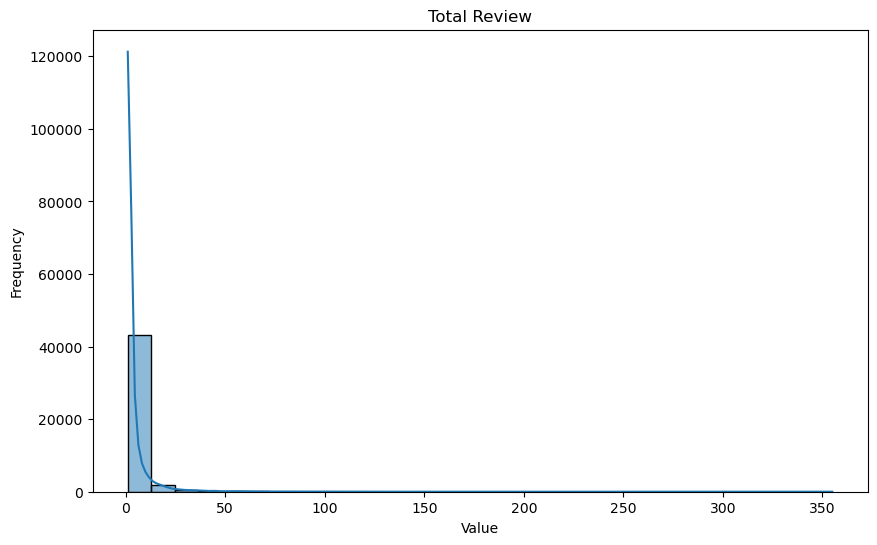

In [34]:
# Print the frequency count of each unique value in the 'Total Review' column
print(data["Total Review"].value_counts())

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a Kernel Density Estimate (KDE) for the 'Total Review' column
sns.histplot(data["Total Review"], bins=30, kde=True)

# Set the title of the plot
plt.title('Total Review')

# Label the x-axis
plt.xlabel('Value')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


Rating
5    31353
1    10581
4     2199
3     1048
2      903
Name: count, dtype: int64


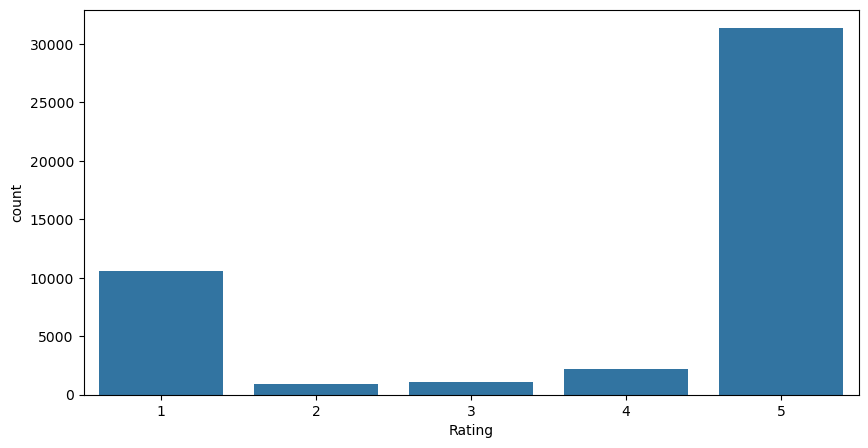

In [35]:
# Print the frequency count of each unique value in the 'Rating' column
print(data["Rating"].value_counts())

# Create a subplot with a specific size
fig, axs = plt.subplots(figsize=(10, 5))

# Create a count plot for the 'Rating' column to visualize the distribution of ratings
sns.countplot(x=data["Rating"])

# Display the plot
plt.show()

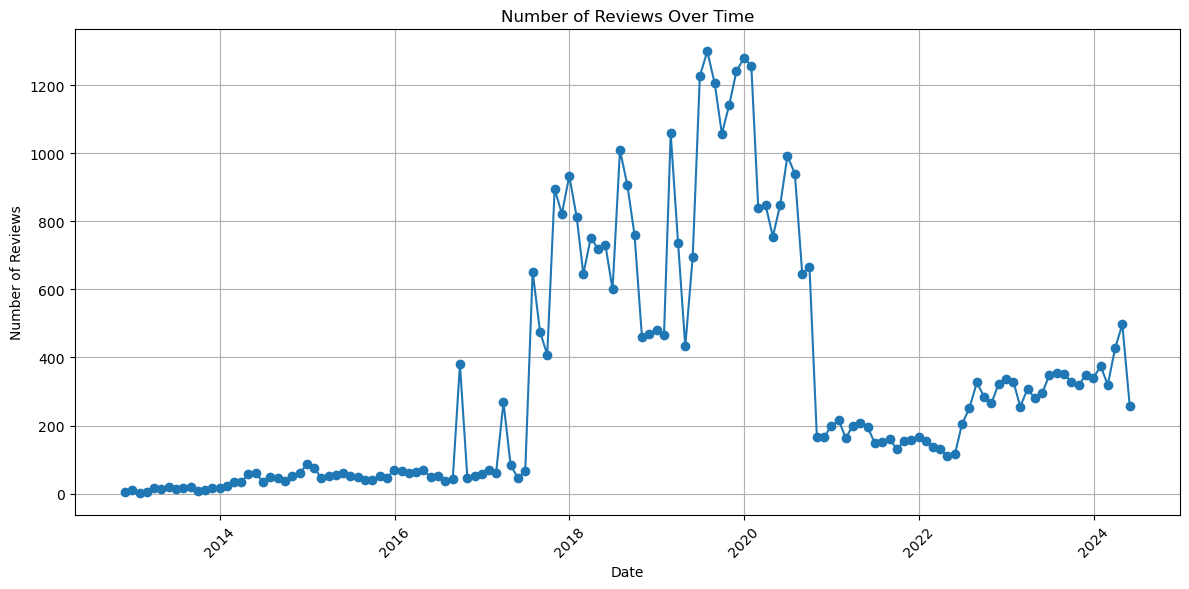

In [36]:
# Set the date column as the index
data.set_index('Date of Experience', inplace=True)

# Resample data to monthly frequency and count the number of reviews per month
monthly_reviews = data['cleaned_review'].resample('M').count()

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews.index, monthly_reviews.values, marker='o', linestyle='-')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

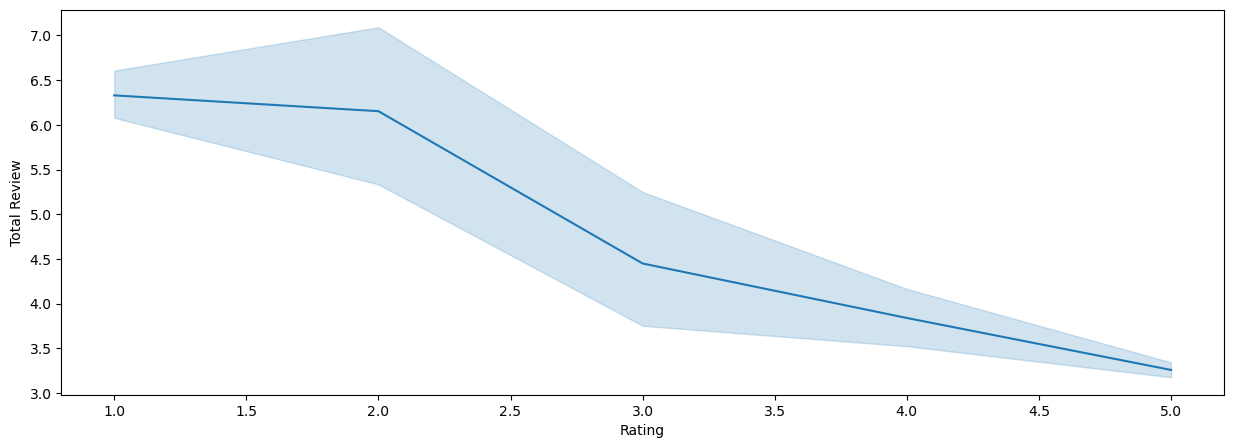

In [37]:
# Set the size of the figure
plt.figure(figsize=(15, 5))

# Create a line plot with 'Rating' on the x-axis and 'Total Review' on the y-axis
sns.lineplot(y="Total Review", x="Rating", data=data)

# Display the plot
plt.show()

It was observed that the more the number of reviews by a customer, the lesser the rating.

In [39]:
# Display the first few rows of the DataFrame to check its structure and content
data.head()

Id                     Username Location  Total Review  \
Date of Experience                                                           
2024-01-30           0            Christopher Smith       GB             3   
2024-05-16           1              blarp tha alien       AU             1   
2024-05-13           2  Margarita Chavez Villalobos       US             3   
2024-05-18           3                 Mario Alzate       US             1   
2024-05-04           4                      AE user       US             1   

                    Rating                                     cleaned_review  
Date of Experience                                                             
2024-01-30               4  shopping ever chose choice delivery not wait 4...  
2024-05-16               5  legit great place find amazing bargain but mus...  
2024-05-13               3  pretty delivering small itemsbut big careful c...  
2024-05-18               5  well educate little best benefit search featur...  
2024-05-04               5  found nice deal but also ran scam fake seller ...

In [40]:
# Extract the 'cleaned_review' column into a variable named 'sentences'
sentences = data["cleaned_review"]

# Combine all reviews with a rating of 4 or higher into a single string for positive reviews
pos = ' '.join(map(str, sentences[data["Rating"] >= 4]))

# Combine all reviews with a rating of 3 into a single string for neutral reviews
neu = ' '.join(map(str, sentences[data["Rating"] == 3]))

# Combine all reviews with a rating of 2 or lower into a single string for negative reviews
neg = ' '.join(map(str, sentences[data["Rating"] <= 2]))

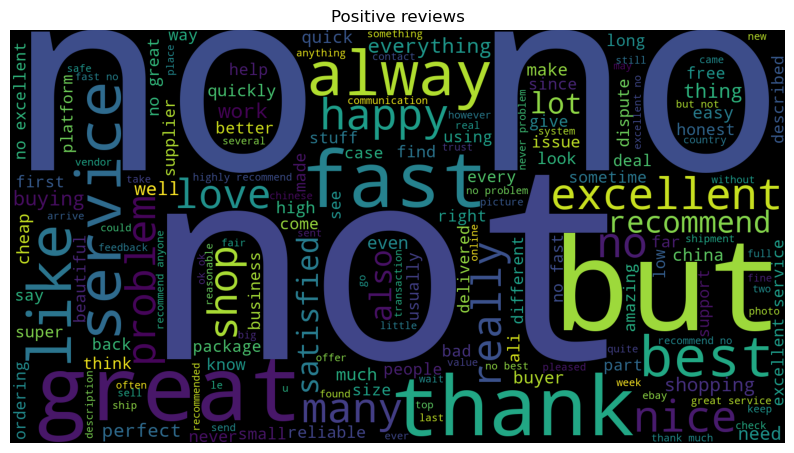

In [41]:
# Generate a word cloud for positive reviews
pos_wordcloud = WordCloud(width=1500, height=800,
                         background_color='black',
                         stopwords=stop_words,
                         min_font_size=15).generate(pos)

# Create a figure for displaying the word cloud
plt.figure(figsize=(10, 10))

# Display the generated word cloud image
plt.imshow(pos_wordcloud)

# Set the title of the plot
plt.title("Positive reviews")

# Remove the axes from the plot
plt.axis("off")

# Show the plot
plt.show()

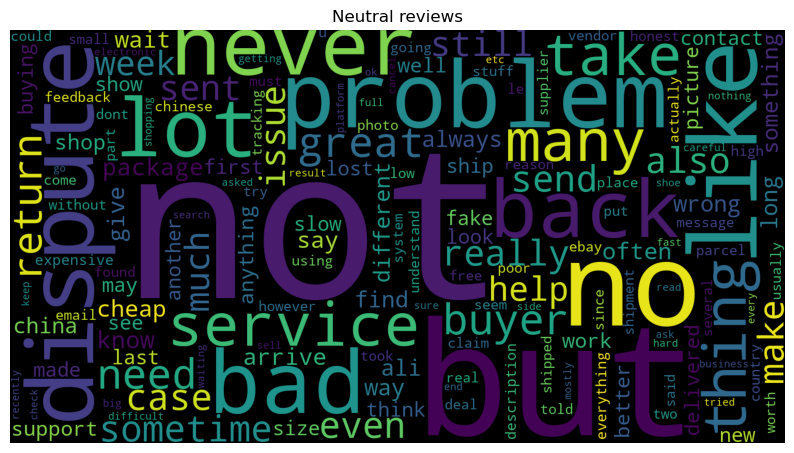

In [42]:
# Generate a word cloud for neutral reviews
neu_wordcloud = WordCloud(width=1500, height=800,
                         background_color='black',
                         stopwords=stop_words,
                         min_font_size=15).generate(neu)

# Create a figure for displaying the word cloud
plt.figure(figsize=(10, 10))

# Display the generated word cloud image
plt.imshow(neu_wordcloud)

# Set the title of the plot
plt.title("Neutral reviews")

# Remove the axes from the plot
plt.axis("off")

# Show the plot
plt.show()

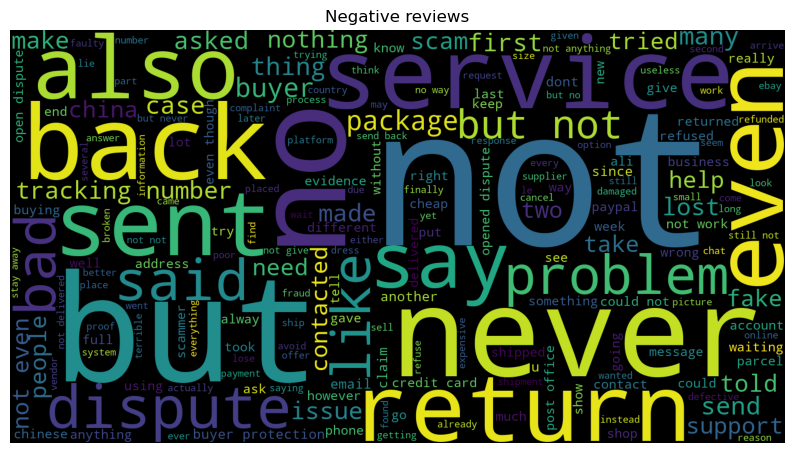

In [43]:
# Generate a word cloud for negative reviews
neg_wordcloud = WordCloud(width=1500, height=800,
                         background_color='black',
                         stopwords=stop_words,
                         min_font_size=15).generate(neg)

# Create a figure for displaying the word cloud
plt.figure(figsize=(10, 10))

# Display the generated word cloud image
plt.imshow(neg_wordcloud)

# Set the title of the plot
plt.title("Negative reviews")

# Remove the axes from the plot
plt.axis("off")

# Show the plot
plt.show()

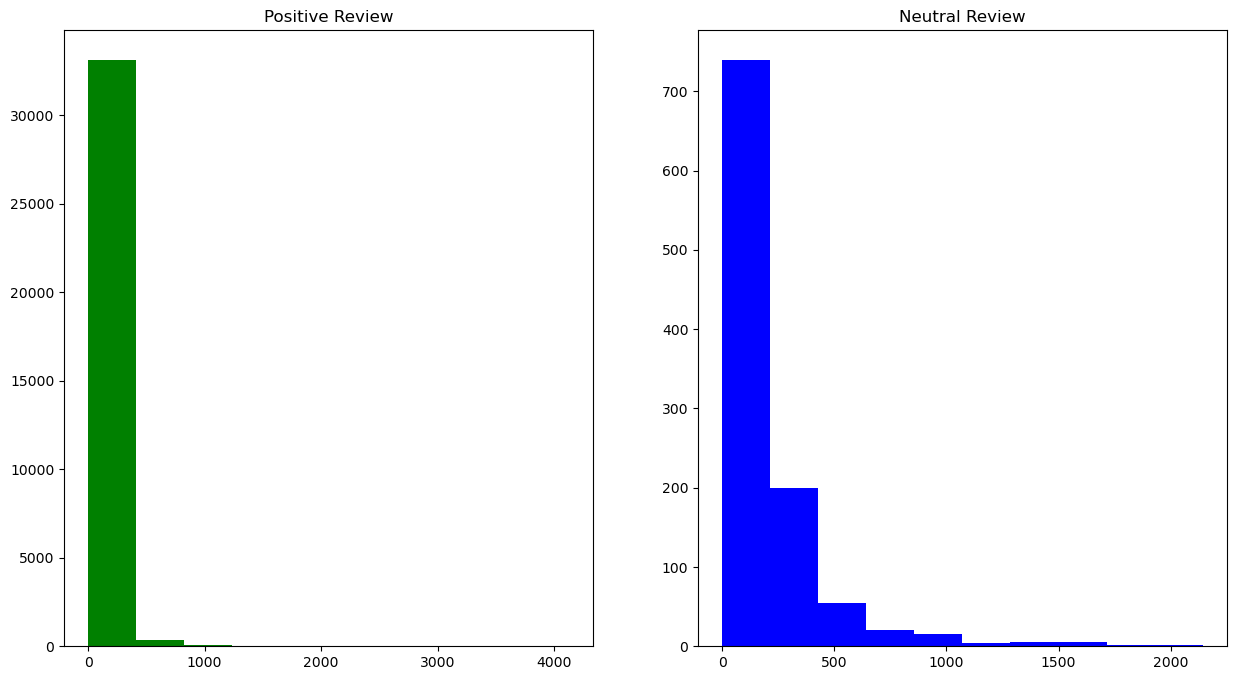

In [44]:
# Create a figure with two subplots (1 row, 2 columns) and set the size of the figure
figure, (pos_ax, neu_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Compute the length of positive reviews (rating >= 4)
len_pos_review = data[data["Rating"] >= 4]["cleaned_review"].str.len()

# Plot a histogram of the lengths of positive reviews on the first subplot
pos_ax.hist(len_pos_review, color='green')
pos_ax.set_title('Positive Review')

# Compute the length of neutral reviews (rating == 3)
len_neu_review = data[data["Rating"] == 3]["cleaned_review"].str.len()

# Plot a histogram of the lengths of neutral reviews on the second subplot
neu_ax.hist(len_neu_review, color='blue')
neu_ax.set_title('Neutral Review')

# Display the plots
plt.show()

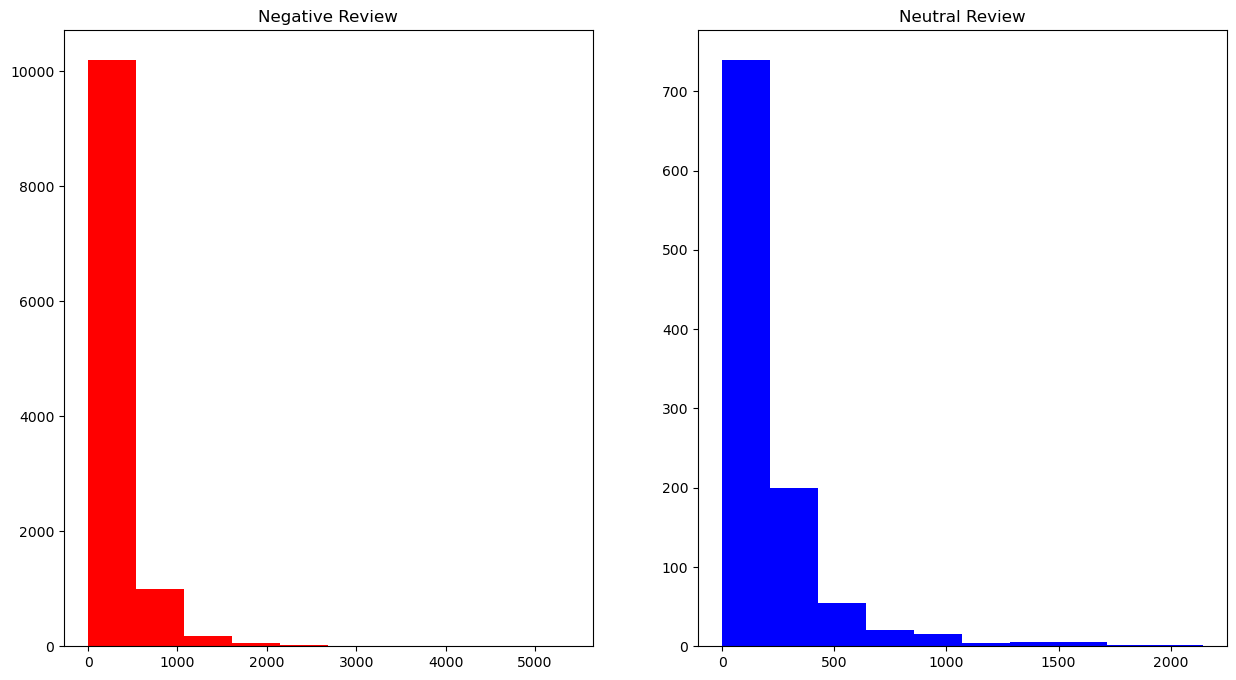

In [45]:
# Create a figure with two subplots (1 row, 2 columns) and set the size of the figure
figure, (neg_ax, neu_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Compute the length of negative reviews (rating <= 2)
len_neg_review = data[data["Rating"] <= 2]["cleaned_review"].str.len()

# Plot a histogram of the lengths of negative reviews on the first subplot
neg_ax.hist(len_neg_review, color='red')
neg_ax.set_title('Negative Review')

# Compute the length of neutral reviews (rating == 3)
len_neu_review = data[data["Rating"] == 3]["cleaned_review"].str.len()

# Plot a histogram of the lengths of neutral reviews on the second subplot
neu_ax.hist(len_neu_review, color='blue')
neu_ax.set_title('Neutral Review')

# Display the plots
plt.show()

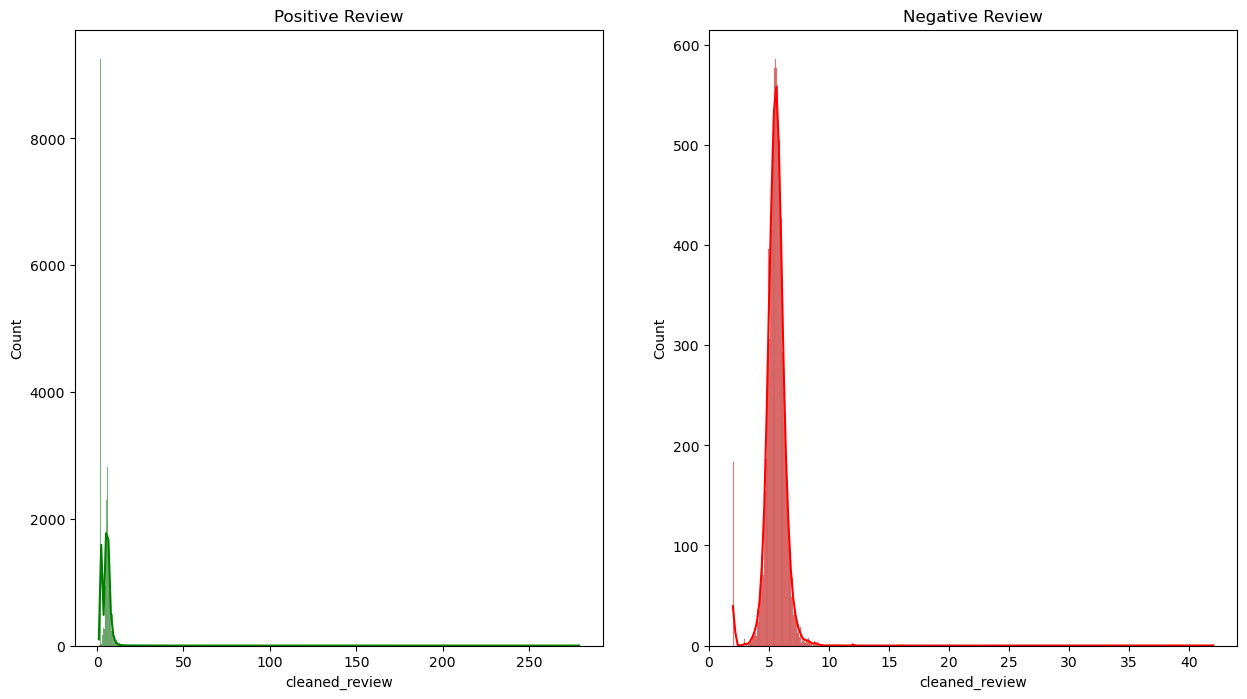

In [46]:
# Create a figure with two subplots (1 row, 2 columns) and set the size of the figure
figure, (pos_ax, neu_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Compute the length of each word in positive reviews (rating >= 4)
# Split the reviews into words, compute the length of each word, and then calculate the average word length for each review
pos_word = data[data["Rating"] >= 4]["cleaned_review"].str.split().apply(lambda x: [len(i) for i in x])

# Plot the distribution of average word lengths in positive reviews
sns.histplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green', kde=True)
pos_ax.set_title("Positive Review")

# Compute the length of each word in negative reviews (rating <= 2)
# Split the reviews into words, compute the length of each word, and then calculate the average word length for each review
neg_word = data[data["Rating"] <= 2]["cleaned_review"].str.split().apply(lambda x: [len(i) for i in x])

# Plot the distribution of average word lengths in negative reviews
sns.histplot(neg_word.map(lambda x: np.mean(x)), ax=neu_ax, color='red', kde=True)
neu_ax.set_title("Negative Review")

# Display the plots
plt.show()

In [47]:
# Function to get the top words or n-grams from a corpus
def get_top_words(corpus, n, g):
    """
    Extract the top 'n' most frequent words or n-grams from a given text corpus.

    Parameters:
    - corpus: List of strings, where each string is a document or review.
    - n: Integer, the number of top words or n-grams to return.
    - g: Integer, the size of the n-grams (e.g., 1 for unigrams, 2 for bigrams).

    Returns:
    - List of tuples where each tuple contains a word or n-gram and its frequency.
    """
    # Create a CountVectorizer instance to extract n-grams with specified size
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    
    # Transform the corpus into a matrix of token counts
    bag_of_words = vec.transform(corpus)
    
    # Sum up the counts of each word or n-gram across all documents
    sum_words = bag_of_words.sum(axis=0)
    
    # Create a list of tuples where each tuple contains a word or n-gram and its frequency
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Sort the list of tuples by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Return the top 'n' most frequent words or n-grams
    return words_freq[:n]

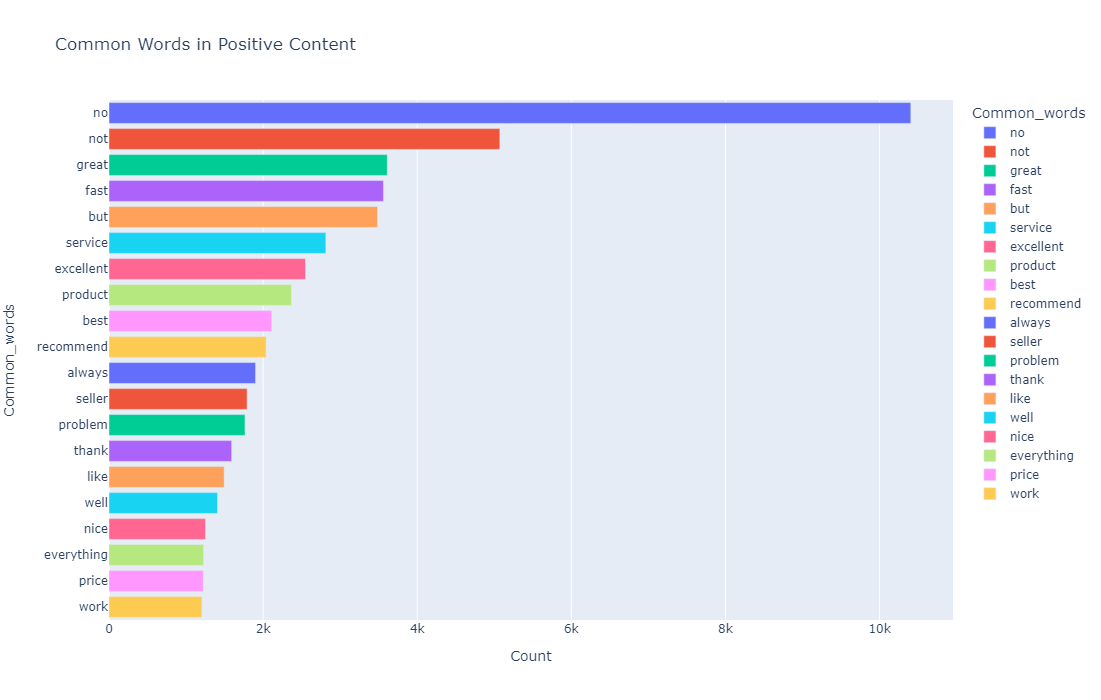

In [48]:
# Get the top 20 most common unigrams from positive reviews (rating >= 4)
most_common_uni = get_top_words(data.cleaned_review[data["Rating"] >= 4], 20, 1)

# Convert the list of tuples to a dictionary
most_common_uni = dict(most_common_uni)

# Create a DataFrame to store the common words and their counts
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Create a horizontal bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_words", 
             title="Common Words in Positive Content", 
             orientation="h",
             width=700, height=700,
             color="Common_words")

# Display the plot
fig.show()

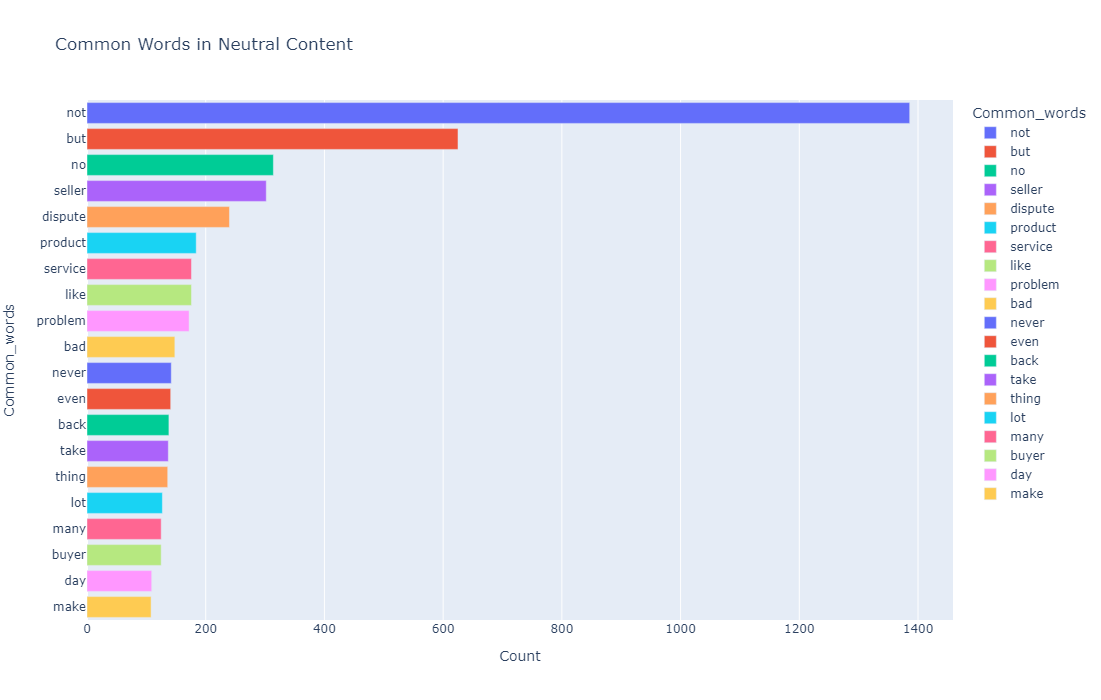

In [49]:
# Get the top 20 most common unigrams from neutral reviews (rating == 3)
most_common_uni = get_top_words(data.cleaned_review[data["Rating"] == 3], 20, 1)

# Convert the list of tuples to a dictionary
most_common_uni = dict(most_common_uni)

# Create a DataFrame to store the common words and their counts
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Create a horizontal bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_words", 
             title="Common Words in Neutral Content", 
             orientation="h",
             width=700, height=700,
             color="Common_words")

# Display the plot
fig.show()

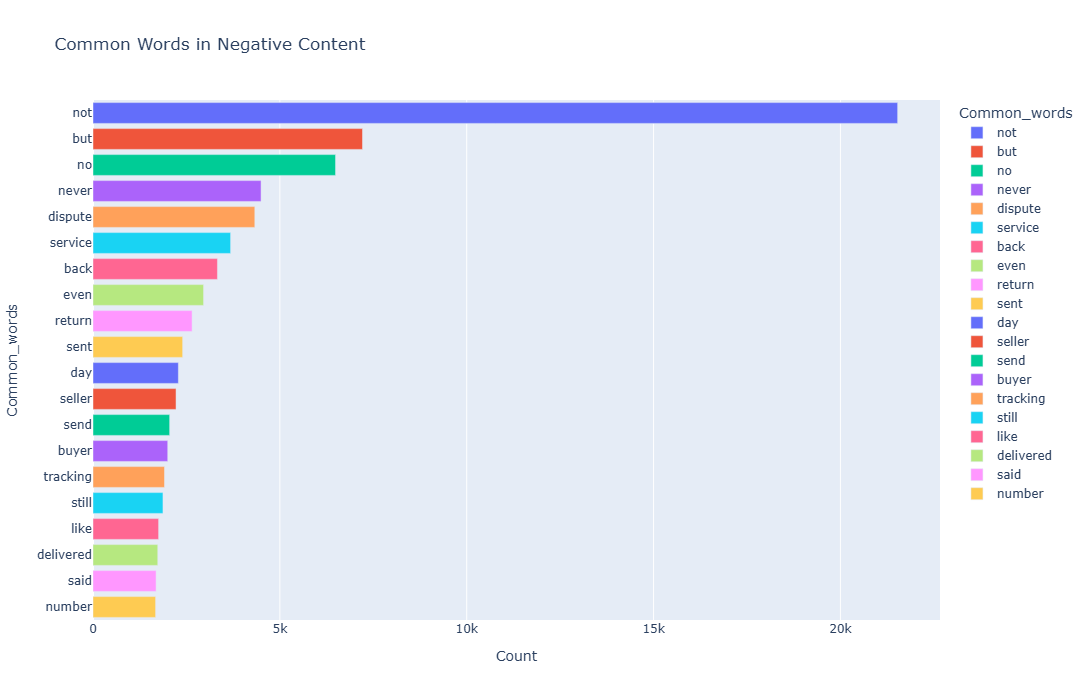

In [50]:
# Get the top 20 most common unigrams from negative reviews (rating <= 2)
most_common_uni = get_top_words(data.cleaned_review[data["Rating"] <= 2], 20, 1)

# Convert the list of tuples to a dictionary
most_common_uni = dict(most_common_uni)

# Create a DataFrame to store the common words and their counts
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Create a horizontal bar plot using Plotly Express
fig = px.bar(temp, x="Count", y="Common_words", 
             title="Common Words in Negative Content", 
             orientation="h",
             width=700, height=700,
             color="Common_words")

# Display the plot
fig.show()

## Data Pre-processing and feature engineering

In [52]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    # Classify the polarity of the review
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment function
data['Sentiment'] = data['cleaned_review'].apply(get_sentiment)

data.head(10)

Id                     Username Location  Total Review  \
Date of Experience                                                           
2024-01-30           0            Christopher Smith       GB             3   
2024-05-16           1              blarp tha alien       AU             1   
2024-05-13           2  Margarita Chavez Villalobos       US             3   
2024-05-18           3                 Mario Alzate       US             1   
2024-05-04           4                      AE user       US             1   
2024-05-16           5                    Joe Turbo       GB            29   
2024-04-16           6                 Roman Zelnik       SK            19   
2024-04-30           7                     Hazeydee       US             3   
2024-05-17           8                David Clayton       GB            17   
2024-05-16           9                Alan Bradford       GB            29   

                    Rating                                     cleaned_review  \
Date of Experience                                                              
2024-01-30               4  shopping ever chose choice delivery not wait 4...   
2024-05-16               5  legit great place find amazing bargain but mus...   
2024-05-13               3  pretty delivering small itemsbut big careful c...   
2024-05-18               5  well educate little best benefit search featur...   
2024-05-04               5  found nice deal but also ran scam fake seller ...   
2024-05-16               1  never contacting national postal told returned...   
2024-04-16               1  ask immediately return fund returned created a...   
2024-04-30               1  recently nephew birthday stillnhave not emaile...   
2024-05-17               1  new card sony camera seemed cheap 175 came gua...   
2024-05-16               1  several successfully however last not actually...   

                   Sentiment  
Date of Experience            
2024-01-30           neutral  
2024-05-16          positive  
2024-05-13          negative  
2024-05-18          positive  
2024-05-04          positive  
2024-05-16          positive  
2024-04-16          positive  
2024-04-30          positive  
2024-05-17          positive  
2024-05-16          positive

In [54]:
# Define a mapping for sentiment values
sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

# Convert the sentiment column to numeric
data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)


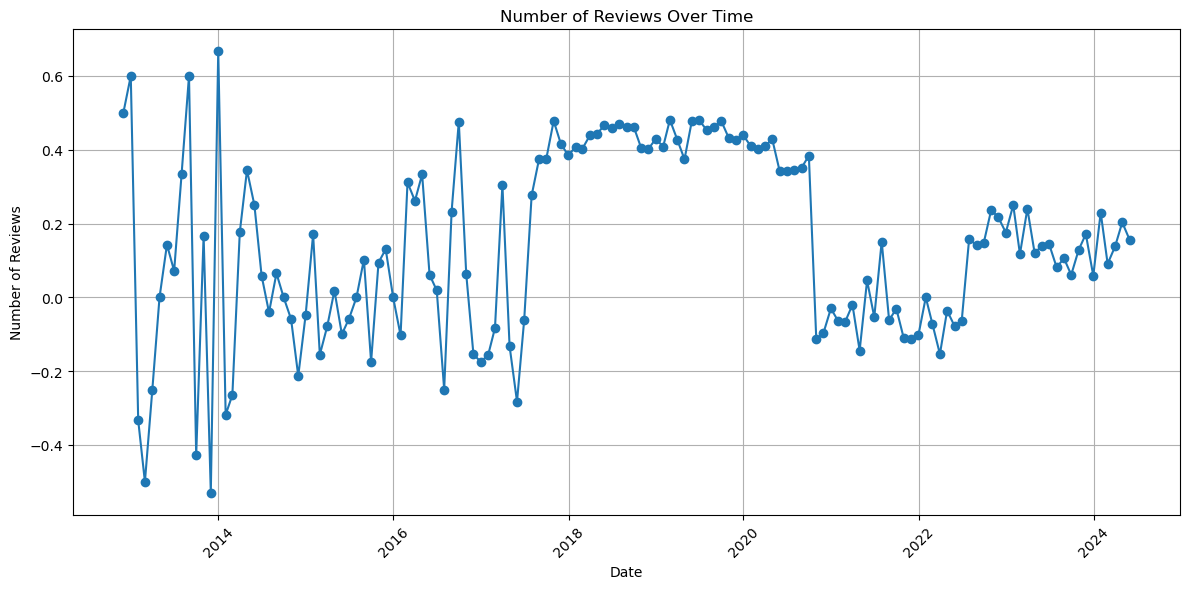

In [55]:
# Set the date column as the index
#data.set_index('Date of Experience', inplace=True)

# Resample data to monthly frequency and count the number of reviews per month
monthly_reviews = data['Sentiment'].resample('M').mean()

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews.index, monthly_reviews.values, marker='o', linestyle='-')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:

# Define the reverse mapping for sentiment values
reverse_sentiment_mapping = {
    1: 'positive',
    0: 'neutral',
    -1: 'negative'
}

# Convert numeric sentiment values back to categorical
data['Sentiment'] = data['Sentiment'].map(reverse_sentiment_mapping)


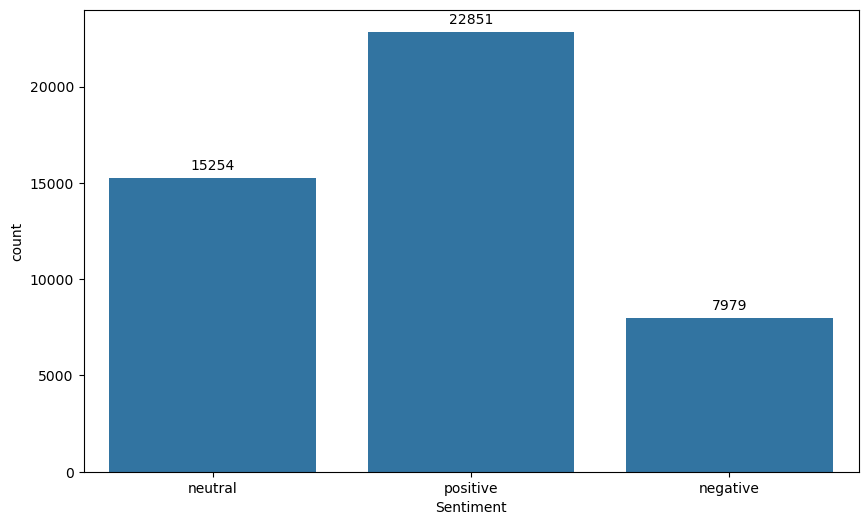

In [57]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sentiment', data=data)

# Add the counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', 
               xytext=(0, 9), 
               textcoords='offset points')
    
# Show the plot
plt.show()


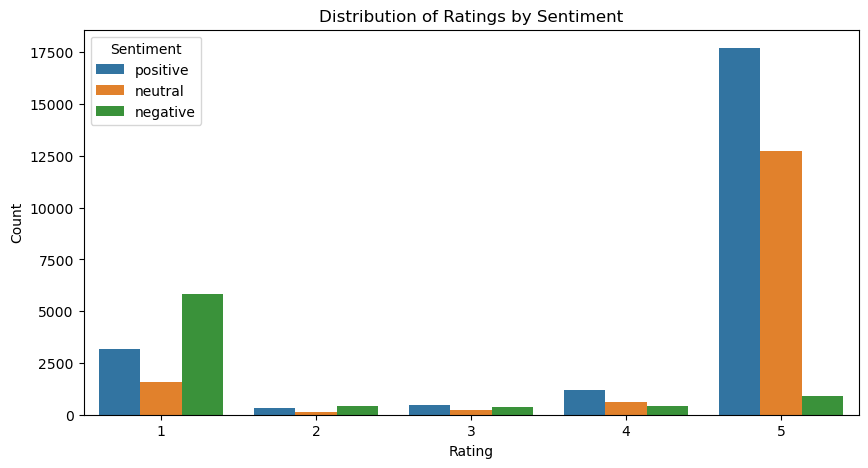

In [58]:
# Initialize the figure and axis for the plot
fig, axs = plt.subplots(figsize=(10, 5))

# Create a count plot of review ratings with sentiment labels as hue
sns.countplot(x="Rating", data=data, hue="Sentiment")

# Add title and labels
plt.title("Distribution of Ratings by Sentiment")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.show()

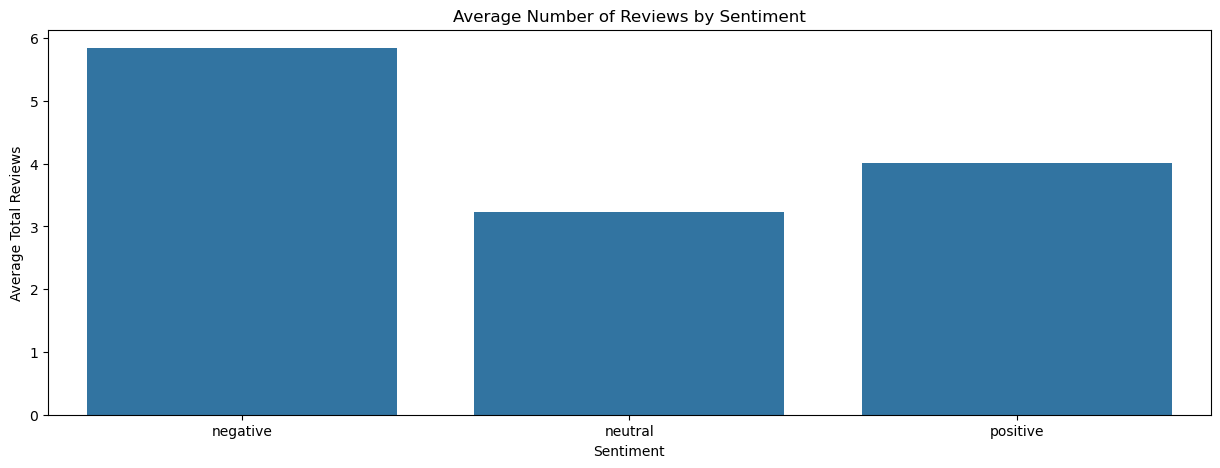

In [59]:
# Calculate the average number of reviews for each sentiment category
avg_reviews_per_sentiment = data.groupby('Sentiment')['Total Review'].mean().reset_index()

# Initialize the figure
plt.figure(figsize=(15, 5))

# Create a bar plot
sns.barplot(x='Sentiment', y='Total Review', data=avg_reviews_per_sentiment)

# Add title and labels
plt.title('Average Number of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Total Reviews')

# Show the plot
plt.show()


It was observed that the more the number of reviews by a customer, there is increase in negativity as regards the sentimenmt.

In [61]:
data.head()

Id                     Username Location  Total Review  \
Date of Experience                                                           
2024-01-30           0            Christopher Smith       GB             3   
2024-05-16           1              blarp tha alien       AU             1   
2024-05-13           2  Margarita Chavez Villalobos       US             3   
2024-05-18           3                 Mario Alzate       US             1   
2024-05-04           4                      AE user       US             1   

                    Rating                                     cleaned_review  \
Date of Experience                                                              
2024-01-30               4  shopping ever chose choice delivery not wait 4...   
2024-05-16               5  legit great place find amazing bargain but mus...   
2024-05-13               3  pretty delivering small itemsbut big careful c...   
2024-05-18               5  well educate little best benefit search featur...   
2024-05-04               5  found nice deal but also ran scam fake seller ...   

                   Sentiment  
Date of Experience            
2024-01-30           neutral  
2024-05-16          positive  
2024-05-13          negative  
2024-05-18          positive  
2024-05-04          positive

In [62]:
#Dropping of data not needed in model development
# Reset the index and restore the previous index as a column
data.reset_index(inplace=True)

data.drop("Id", inplace= True, axis= 1)
data.drop("Username", inplace= True, axis= 1)
data.drop("Location", inplace= True, axis= 1)
data.drop("Total Review", inplace= True, axis= 1)
data.drop("Rating", inplace= True, axis= 1)
data.drop("Date of Experience", inplace= True, axis= 1)

#data.drop("Polarity", inplace= True, axis= 1)
#data.drop("Subjectivity", inplace= True, axis= 1)

data.head()

cleaned_review Sentiment
0  shopping ever chose choice delivery not wait 4...   neutral
1  legit great place find amazing bargain but mus...  positive
2  pretty delivering small itemsbut big careful c...  negative
3  well educate little best benefit search featur...  positive
4  found nice deal but also ran scam fake seller ...  positive

## Machine Learning

### Model Training

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data["cleaned_review"],  # Features: cleaned review text
    data["Sentiment"],       # Target: sentiment labels
    test_size=0.2,           # 20% of the data will be used for testing
    random_state=42          # Set a seed for reproducibility
)


In [66]:
# Initialize the TF-IDF Vectorizer
tvec = TfidfVectorizer()

# Initialize the Logistic Regression model
lg = LogisticRegression(solver="lbfgs")

### Model Building (Logistic Regression)

In [68]:
# Create and train the pipeline
logreg = Pipeline([("vectorizer", tvec), ("classifier", lg)])
logreg.fit(X_train, y_train)

# Make predictions
logreg_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy :", accuracy_score(y_test, logreg_pred))
print("Precision :", precision_score(y_test, logreg_pred, average="weighted"))
print("Recall :", recall_score(y_test, logreg_pred, average="weighted"))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, logreg_pred))


Accuracy : 0.9149397851795595
Precision : 0.9149918910174306
Recall : 0.9149397851795595

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1612
     neutral       0.95      0.95      0.95      3050
    positive       0.93      0.93      0.93      4555

    accuracy                           0.91      9217
   macro avg       0.90      0.89      0.89      9217
weighted avg       0.91      0.91      0.91      9217



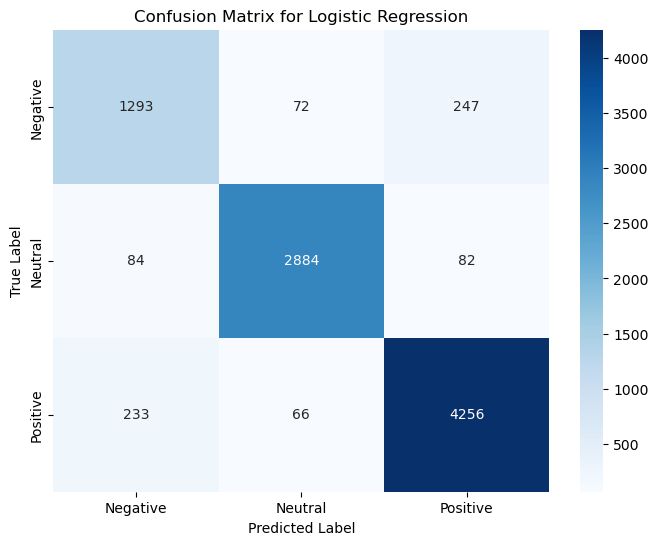

In [69]:
# Compute the confusion matrix
lgmatrix = confusion_matrix(y_test, logreg_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lgmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [70]:
# Test example
example = ["I like the service"]

# Predict sentiment for the example
result = logreg.predict(example)

# Print the result
print(result)

['neutral']


### Model Building (SVC)

In [72]:
# Initialize the SVM with a linear kernel
sv = SVC(kernel='linear')

# Create a pipeline with TF-IDF Vectorizer and SVM classifier
svm = Pipeline([("vectorizer", tvec), ("classifier", sv)])

# Train the model
svm.fit(X_train, y_train)

# Make predictions
svm_pred = svm.predict(X_test)

# Evaluate the model
print("Accuracy :", accuracy_score(y_test, svm_pred))
print("Precision :", precision_score(y_test, svm_pred, average="weighted"))
print("Recall :", recall_score(y_test, svm_pred, average="weighted"))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))


Accuracy : 0.9236193989367473
Precision : 0.9242517622572577
Recall : 0.9236193989367473

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.83      0.82      1612
     neutral       0.96      0.97      0.96      3050
    positive       0.94      0.93      0.93      4555

    accuracy                           0.92      9217
   macro avg       0.90      0.91      0.91      9217
weighted avg       0.92      0.92      0.92      9217



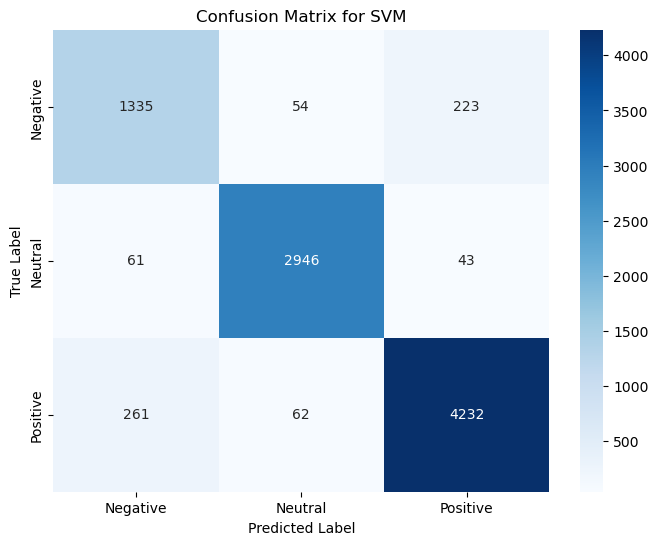

In [73]:
# Compute the confusion matrix
svmatrix = confusion_matrix(y_test, svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

In [74]:
# Test example
example = ["I do not like the service"]

# Predict sentiment for the example
result = svm.predict(example)

# Print the result
print(result)

['neutral']


### Model Building (Naive_Bayes)

In [76]:
# Initialize the Naive Bayes classifier
n = MultinomialNB()

# Create a pipeline with TF-IDF Vectorizer and Naive Bayes classifier
nb = Pipeline([("vectorizer", tvec), ("classifier", n)])

# Train the model
nb.fit(X_train, y_train)

# Make predictions
nb_pred = nb.predict(X_test)

# Evaluate the model
print("Accuracy :", accuracy_score(y_test, nb_pred))
print("Precision :", precision_score(y_test, nb_pred, average="weighted"))
print("Recall :", recall_score(y_test, nb_pred, average="weighted"))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

Accuracy : 0.7527395030921123
Precision : 0.8038180448345676
Recall : 0.7527395030921123

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.30      0.44      1612
     neutral       1.00      0.65      0.79      3050
    positive       0.67      0.98      0.80      4555

    accuracy                           0.75      9217
   macro avg       0.82      0.64      0.68      9217
weighted avg       0.80      0.75      0.73      9217



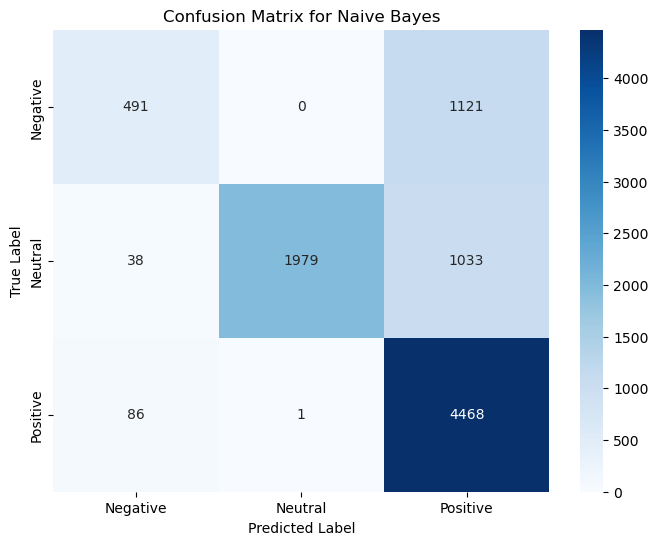

In [77]:
# Compute the confusion matrix
nbmatrix = confusion_matrix(y_test, nb_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nbmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [78]:
# Test example
example = ["no comment"]

# Predict sentiment for the example
result = nb.predict(example)

# Print the result
print(result)

['neutral']


In [79]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = "./TBsentiment_mod.pkl"
joblib.dump(svm, filename)

['./TBsentiment_mod.pkl']